In [1]:
# Run magic commands first

%load_ext autoreload
%autoreload 2
%cd ..

/Users/kevinvu/Root/Projects/housing-nyc


In [2]:
import urbanaccess as ua
import pandas as pd
import geopandas as gpd
import networkx as nx
from shapely import wkt

# Import network
process:
1. import as dataframe, with appropriate data types (dtypes grabbed from original network objects)
2. convert geometry columns to wkt
3. import as geodataframe

In [3]:
col_n = {'id': 'object',
        'x': 'float64',
        'y': 'float64',
        'unique_agency_id': 'object',
        'route_type': 'float64',
        'stop_id': 'object',
        'stop_name': 'object',
        'parent_station': 'object',
        'stop_code': 'float64',
        'zone_id': 'float64',
        'location_type': 'float64',
        'net_type': 'object',
        'geometry': 'geometry',
        'street_count': 'float64',
        'highway': 'object',
        'ref': 'object',}
col_e = {'from': 'object',
        'to': 'object',
        'unique_agency_id': 'object',
        'route_type': 'object',
        'net_type': 'object',
        'total_trips': 'float64',
        'weight': 'float64',
        'geometry': 'object',
        'key': 'float64',
        'edge_id': 'float64',
        'highway': 'object',
        'oneway': 'object',
        'reversed': 'object',
        'name': 'object',
        'maxspeed': 'object',
        'lanes': 'object',
        'ref': 'object',
        'service': 'object',
        'access': 'object',
        'width': 'object',
        'bridge': 'object',
        'junction': 'object',
        'tunnel': 'object',
        'est_width': 'object',
        'area': 'object',
        'from_int': 'int64',
        'to_int': 'int64',}

In [4]:
path = 'notebooks/data/'
df_n = pd.read_csv(path + 'net_nodes.csv', index_col='id_int', dtype=col_n, converters={'geometry': str})
df_e = pd.read_csv(path + 'net_edges.csv', index_col=[0], dtype=col_e, converters={'geometry': str})

/var/folders/3t/1t1r_w1n3fv_x52d58dpfhlc0000gn/T/ipykernel_16166/3336346770.py:2: ParserWarning: Both a converter and dtype were specified for column geometry - only the converter will be used.
  df_n = pd.read_csv(path + 'net_nodes.csv', index_col='id_int', dtype=col_n, converters={'geometry': str})
/var/folders/3t/1t1r_w1n3fv_x52d58dpfhlc0000gn/T/ipykernel_16166/3336346770.py:3: ParserWarning: Both a converter and dtype were specified for column geometry - only the converter will be used.
  df_e = pd.read_csv(path + 'net_edges.csv', index_col=[0], dtype=col_e, converters={'geometry': str})


In [5]:
display(df_n.head())
df_e.head()

,id,x,y,unique_agency_id,route_type,stop_id,stop_name,parent_station,stop_code,zone_id,location_type,net_type,geometry,street_count,highway,ref
id_int,,,,,,,,,,,,,,,,
1,N05N_Q_mta_new_york_city_transit,-73.990414,40.620671,mta_new_york_city_transit,1.0,N05N,18 Av,N05,NaN,NaN,0.0,transit,POINT (-73.990414 40.620671),NaN,NaN,NaN
2,Q01N_Q_mta_new_york_city_transit,-74.000460,40.718383,mta_new_york_city_transit,1.0,Q01N,Canal St,Q01,NaN,NaN,0.0,transit,POINT (-74.00046 40.718383),NaN,NaN,NaN
3,249S_2_mta_new_york_city_transit,-73.942161,40.669399,mta_new_york_city_transit,1.0,249S,Kingston Av,249,NaN,NaN,0.0,transit,POINT (-73.942161 40.669399),NaN,NaN,NaN
4,D13S_B_mta_new_york_city_transit,-73.944216,40.824783,mta_new_york_city_transit,1.0,D13S,145 St,D13,NaN,NaN,0.0,transit,POINT (-73.944216 40.824783),NaN,NaN,NaN
5,635S_4_mta_new_york_city_transit,-73.989951,40.734673,mta_new_york_city_transit,1.0,635S,14 St-Union Sq,635,NaN,NaN,0.0,transit,POINT (-73.989951 40.734673),NaN,NaN,NaN


,from,to,unique_agency_id,route_type,net_type,total_trips,weight,geometry,key,edge_id,...,service,access,width,bridge,junction,tunnel,est_width,area,from_int,to_int
0,101S_1_mta_new_york_city_transit,103S_1_mta_new_york_city_transit,mta_new_york_city_transit,1,transit,175.0,1.528571,"LINESTRING (-73.898583 40.889248, -73.90087 40...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1307,1524
1,103N_1_mta_new_york_city_transit,101N_1_mta_new_york_city_transit,mta_new_york_city_transit,1,transit,177.0,1.500000,"LINESTRING (-73.90087 40.884667, -73.898583 40...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,902,1882
2,103S_1_mta_new_york_city_transit,104S_1_mta_new_york_city_transit,mta_new_york_city_transit,1,transit,191.0,1.500000,"LINESTRING (-73.90087 40.884667, -73.904834 40...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1524,221
3,104N_1_mta_new_york_city_transit,103N_1_mta_new_york_city_transit,mta_new_york_city_transit,1,transit,177.0,2.652542,"LINESTRING (-73.904834 40.878856, -73.90087 40...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141,902
4,104S_1_mta_new_york_city_transit,106S_1_mta_new_york_city_transit,mta_new_york_city_transit,1,transit,191.0,1.500000,"LINESTRING (-73.904834 40.878856, -73.909831 4...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221,861


In [9]:
df_n['geometry'].astype

<bound method NDFrame.astype of id_int
1           POINT (-73.990414 40.620671)
2            POINT (-74.00046 40.718383)
3           POINT (-73.942161 40.669399)
4           POINT (-73.944216 40.824783)
5           POINT (-73.989951 40.734673)
                       ...              
617993    POINT (-74.2172367 40.5209405)
617994    POINT (-74.2149017 40.5213643)
617995    POINT (-74.2145543 40.5213974)
617996    POINT (-74.2146434 40.5213889)
617997     POINT (-74.214722 40.5222953)
Name: geometry, Length: 617997, dtype: object>

## convert geometry columns

In [10]:
df_n['geometry'] = gpd.GeoSeries.from_wkt(df_n['geometry'])
df_e['geometry'] = gpd.GeoSeries.from_wkt(df_e['geometry'])

took about 5 mins. see: https://geopandas.org/en/latest/gallery/create_geopandas_from_pandas.html

In [11]:
df_n['geometry'].astype

<bound method NDFrame.astype of id_int
1         POINT (-73.99041 40.62067)
2         POINT (-74.00046 40.71838)
3         POINT (-73.94216 40.66940)
4         POINT (-73.94422 40.82478)
5         POINT (-73.98995 40.73467)
                     ...            
617993    POINT (-74.21724 40.52094)
617994    POINT (-74.21490 40.52136)
617995    POINT (-74.21455 40.52140)
617996    POINT (-74.21464 40.52139)
617997    POINT (-74.21472 40.52230)
Name: geometry, Length: 617997, dtype: geometry>

# geodataframe

In [12]:
gdf_n = gpd.GeoDataFrame(df_n, crs='epsg:4326', geometry='geometry')
gdf_e = gpd.GeoDataFrame(df_e, crs='epsg:4326', geometry='geometry')

Figure created. Took 221.87 seconds


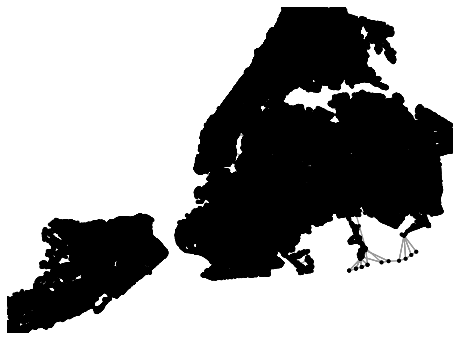

(<Figure size 575.199x432 with 1 Axes>, <AxesSubplot:>)

In [13]:
ua.plot_net(df_n, df_e)

## save walk/subway network to gpkg

In [14]:
gdf_n.to_file(path + "nyc-walk-subway.gpkg", layer='nodes', driver="GPKG")
gdf_e.to_file(path + "nyc-walk-subway.gpkg", layer='edges', driver="GPKG")

takes about 30 mins to export as gpkg

# networkx graph

In [ ]:
G = nx.MultiDiGraph(